In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
#importing the dataset, and showing the first 5 rows, and from there we can see what columns of data is useful and what columns are not, and can be safely removed
credit_card_data = pd.read_csv('Credit_card.csv')

In [3]:
#importing the credit card labels
label = pd.read_csv("Credit_card_label.csv")
label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [4]:
#merging the two datasets together, to have a single combined dataset
data = credit_card_data.merge(label, on='Ind_ID', how='left')
data
# If the number under the label is 1, then it means that the person had their credit card rejected, and if the number under the label is 0, then it means that the person had their credit card aproved

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [5]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [7]:
data.describe()
# from the label we can see that credit cards are most likly to be aproved, and not rejected, as the mean of the label is 0.11, meaning that most of the credit cards were closer to 0, and were therefore aproved

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [8]:
data.isna().sum()
# checking if there are any missing values in the data set by using the isna() function, to check for any missing values, before then summing up the missing values

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [9]:
# we can see here that almost half of the data for the column "Type_Occupation" is missing, and therefore we cannot remove the data points that are missing the Type_Occupation, as it 
# would mean the potential loss of half of the data, so instead what we can do is to just drop the column "Type_Occupation" from the dataset, as it is not useful for the analysis anyways
# after that we can drop the remaining missing values from the dataset, as it is only a small amount of data, and it will mostly not affect the analysis, with the excpetion of the column "Annual_income"
# but since it only has a comparitively small amount of missing values, it should not affect the analysis too much

data.drop(columns = ['Type_Occupation'], inplace = True)
# in order to drop the column "Type_Occupation" from the dataset, we have to give the column name, and set inplace to True, so that the changes are made to the dataset

In [10]:
data.isna().sum()
# we can see from the updated dataset that the column "Type_Occupation", and all its data has been removed from the dataset

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count    22
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

In [11]:
# to drop rows that have missing values, and not the entire column we can use the function .dropna(), and set the parameter inplace to True, so that the changes are made to the dataset
data.dropna(inplace = True)

In [12]:
data.isna().sum()
# we can now see that there are no more missing values in the dataset anymore, before working with the dataset, we now have to check for any duplicates in the dataset, and remove them if there are any

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [13]:
data.duplicated().sum()
# here we can see that there aren't any duplicates in the dataset, but if there were any, we could easily remove them using the pandas .drop_duplicates() function, making sure to set inplace to True

0

In [14]:
average_income = data['Annual_income'].mean()
average_income

190775.04846256683

In [15]:
gender_income = data.groupby("GENDER")["Annual_income"].mean()
gender_income

# we can also sort this by ascending order by calling the function sort_values(), and setting the parameter acsending to False
# it is also possible to call the index of the dataframe, if you only want one of the values: gender_income[0]

GENDER
F    172391.840021
M    222485.245902
Name: Annual_income, dtype: float64

C:\Users\Xi Chen\AppData\Local\Temp\ipykernel_18232\1524947204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_income.index, y = gender_income.values, palette=colour_cols)


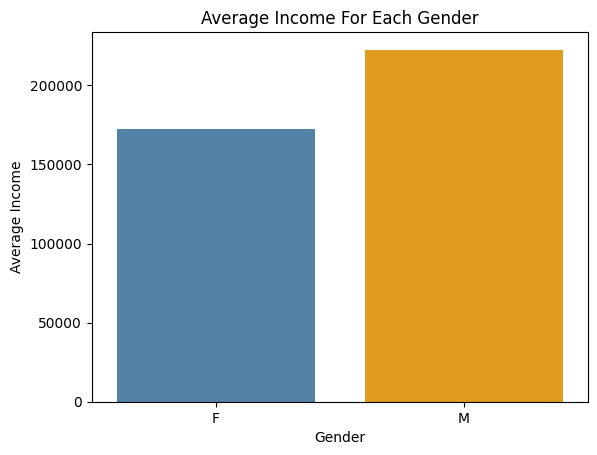

In [16]:
colour_cols = ["steelblue", "orange"]

sns.barplot(x = gender_income.index, y = gender_income.values, palette=colour_cols)
plt.title("Average Income For Each Gender")
plt.xlabel("Gender")
plt.ylabel("Average Income")
plt.show()

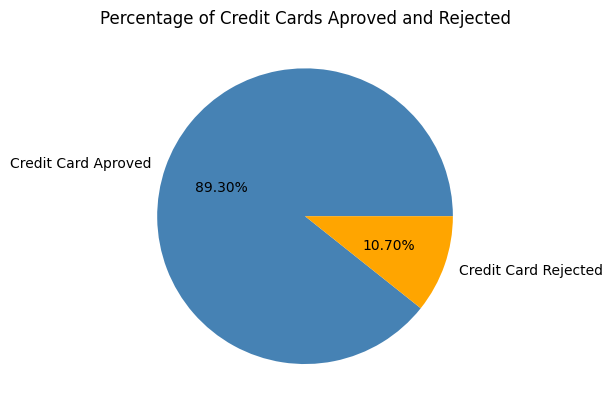

In [17]:
# Now to use seaborn in visualizing the percentage of people who had their credit card rejected, and the percentage of people who had their credit card aproved

label_count = data["label"].value_counts()

plt.pie(label_count, labels = ["Credit Card Aproved", "Credit Card Rejected"], autopct = "%.2f%%", colors = ["steelblue", "orange"])
plt.title("Percentage of Credit Cards Aproved and Rejected")
plt.show()

In [18]:
data.groupby("Type_Income")["Annual_income"].mean()

Type_Income
Commercial associate    233880.169972
Pensioner               154964.866795
State servant           210130.434783
Working                 180154.579974
Name: Annual_income, dtype: float64

In [19]:
data.groupby("Marital_status")["Employed_days"].mean()

Marital_status
Civil marriage           30026.980198
Married                  50073.888229
Separated                77952.230769
Single / not married     51481.500000
Widow                   222997.520000
Name: Employed_days, dtype: float64

In [20]:
data.groupby("Housing_type")["Family_Members"].sum()

Housing_type
Co-op apartment           5
House / apartment      2900
Municipal apartment      92
Office apartment         21
Rented apartment         46
With parents            175
Name: Family_Members, dtype: int64

In [21]:
data.groupby("GENDER")["Birthday_count"].min() * -1
# multiply by -1 in order to get rid of the negative number in the birthday count

GENDER
F    24946.0
M    24662.0
Name: Birthday_count, dtype: float64

In [22]:
data.groupby("Propert_Owner")["Annual_income"].mean()

Propert_Owner
N    183343.352601
Y    194722.899181
Name: Annual_income, dtype: float64

In [23]:
data.groupby("EDUCATION")["Mobile_phone"].min()

EDUCATION
Academic degree                  1
Higher education                 1
Incomplete higher                1
Lower secondary                  1
Secondary / secondary special    1
Name: Mobile_phone, dtype: int64

In [24]:
data.groupby("CHILDREN")["Annual_income"].mean()

CHILDREN
0     182400.735014
1     215498.657718
2     203309.302326
3     177862.500000
4     180000.000000
14    225000.000000
Name: Annual_income, dtype: float64

C:\Users\Xi Chen\AppData\Local\Temp\ipykernel_18232\3264131491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Marital_status", y = "Annual_income", data = data, palette = colour_cols)
C:\Users\Xi Chen\AppData\Local\Temp\ipykernel_18232\3264131491.py:1: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = "Marital_status", y = "Annual_income", data = data, palette = colour_cols)


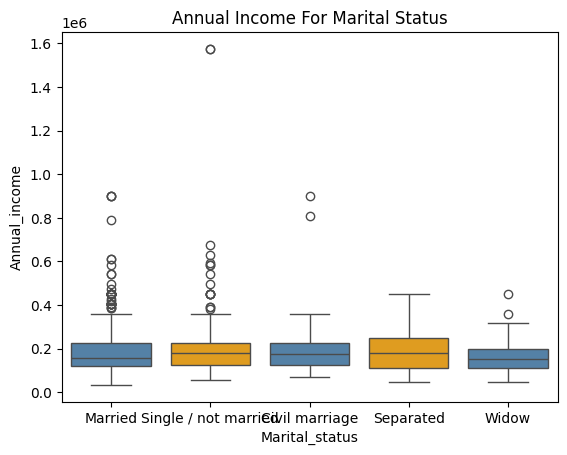

In [25]:
sns.boxplot(x = "Marital_status", y = "Annual_income", data = data, palette = colour_cols)
plt.title("Annual Income For Marital Status")
plt.show()

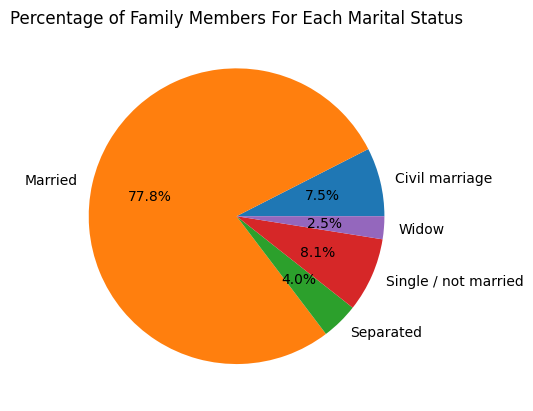

In [27]:
data.groupby("Marital_status")["Family_Members"].sum().plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Percentage of Family Members For Each Marital Status")
plt.ylabel("") # to remove the label for the y axis, as sometimes there can be an extra label for the y axis
plt.show()

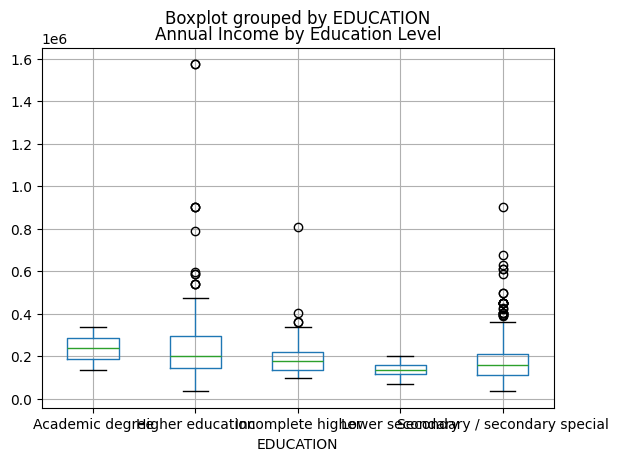

In [28]:
data.boxplot(column = "Annual_income", by = "EDUCATION")
plt.title("Annual Income by Education Level")
plt.show()

In [29]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,3,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,2,0


In [30]:
# from here we now know that the data is clean, and there are no null values, and all the data is in the correct format, so we can proceed to the next step, removing the columns that are not useful
# the columns that are not useful are the ones not related to the fianances, or would a factor to the fianaces of the person
# in this case we can safely remove the following columns: Birthday_count, Mobile_number, Email_address, and ID

#columns_to_drop = ['Birthday_count', 'Mobile_number', 'Email_address', 'ID'] 
# !!!!might have to remove this after!!!!

data = data[["Car_Owner", "Propert_Owner", "Annual_income", "EDUCATION", "label"]]  # can't include Housing_type for some reason
# including the num of children might mess up the 
data

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,Y,Y,180000.0,Higher education,1
1,Y,N,315000.0,Higher education,1
4,Y,N,315000.0,Higher education,1
6,Y,N,315000.0,Higher education,1
7,N,N,180000.0,Secondary / secondary special,1
...,...,...,...,...,...
1542,Y,N,360000.0,Secondary / secondary special,0
1544,N,N,225000.0,Incomplete higher,0
1545,Y,Y,180000.0,Higher education,0
1546,Y,N,270000.0,Secondary / secondary special,0


In [31]:
labelEcoder = preprocessing.LabelEncoder()
data["Car_Owner"] = labelEcoder.fit_transform(data["Car_Owner"])
data["Propert_Owner"] = labelEcoder.fit_transform(data["Propert_Owner"])
data["EDUCATION"] = labelEcoder.fit_transform(data["EDUCATION"])

# turning the non numerical data into numerical data, so that it can be used in the machine learning model, by using the label encoder function from sklearn

C:\Users\Xi Chen\AppData\Local\Temp\ipykernel_18232\2608878005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Car_Owner"] = labelEcoder.fit_transform(data["Car_Owner"])
C:\Users\Xi Chen\AppData\Local\Temp\ipykernel_18232\2608878005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Propert_Owner"] = labelEcoder.fit_transform(data["Propert_Owner"])
C:\Users\Xi Chen\AppData\Local\Temp\ipykernel_18232\2608878005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [32]:
data
# now from the table below, we can see that all the values are numerrical, and can be used in the machine learning model

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,1,1,180000.0,1,1
1,1,0,315000.0,1,1
4,1,0,315000.0,1,1
6,1,0,315000.0,1,1
7,0,0,180000.0,4,1
...,...,...,...,...,...
1542,1,0,360000.0,4,0
1544,0,0,225000.0,2,0
1545,1,1,180000.0,1,0
1546,1,0,270000.0,4,0


In [33]:
X = data.iloc[:, :-1]
# to access all the rows, and all the columns except for the last column, which is the label column, and is therefore the column that we want to predict

In [34]:
y = data.iloc[:, -1]
# to access all the rows, and only the last column, which is the label column, and is therefore the column that we want to predict

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [37]:
def modelPerformance(predictions):
    print("Accuracy Score for Model: {}".format(accuracy_score(y_test, predictions)))

In [38]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

log_predictions = log_model.predict(scaled_X_test)

In [39]:
modelPerformance(log_predictions)

Accuracy Score for Model: 0.8957219251336899


In [40]:
param_grid = {"n_neighbors": [3, 5, 7, 9, 11],
              "weights": ["uniform", "distance"],
              "algorithm": ["auto", "kd_tree"]
              }

gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 2)

gridkn.fit(scaled_X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [41]:
gridkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

In [42]:
knpredictions = gridkn.predict(scaled_X_test)
modelPerformance(knpredictions)

Accuracy Score for Model: 0.893048128342246


In [43]:
svm = SVC()
param_grid_svr = {"C": [0.01, 0.1, 0.5, 1],
              "kernel": ["linear", "rbf", "poly"]}

gridsvr = GridSearchCV(svm, param_grid_svr)

gridsvr.fit(scaled_X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [44]:
pred_svc = gridsvr.predict(scaled_X_test)
modelPerformance(pred_svc)

Accuracy Score for Model: 0.8957219251336899


In [45]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [3, 5, 7, 9, 11, 13, 15],
    "min_samples_split": [2, 4, 6, 8, 10, 12, 14, 16],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8]
}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv = 2)

In [46]:
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
                         'splitter': ['best', 'random']})

In [47]:
grid_search_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'splitter': 'random'}

In [48]:
preds = grid_search_tree.predict(X_test)

In [49]:
modelPerformance(preds)

Accuracy Score for Model: 0.8903743315508021


In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ["auto", "sqrt"]
bootstrap = [True, False]
oob_score = [True, False]

In [51]:
param_grid_RFC = {"n_estimators": n_estimators,
                    "max_features": max_features,
                    "bootstrap": bootstrap,
                    "oob_score": oob_score
                    }


In [52]:
grid_RFC = GridSearchCV(rfc_model, param_grid_RFC, cv = 2)

In [53]:
grid_RFC.fit(X_train, y_train)

c:\Users\Xi Chen\.conda\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Xi Chen\.conda\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Xi Chen\.conda\envs\mlenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Xi Chen\.conda\envs\mlenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000],
                         'oob_score': [True, False]})

In [54]:
grid_RFC.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'oob_score': True}

In [55]:
predicRFC = grid_RFC.predict(X_test)
modelPerformance(predicRFC)

Accuracy Score for Model: 0.8743315508021391


In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()
ada_param_grid = {"n_estimators": [50, 100, 150, 200, 250, 300],
                    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100]
                    }

ada_grid_search = GridSearchCV(ada_classifier, ada_param_grid, cv = 2)

ada_grid_search.fit(X_train, y_train)

adaPred = ada_grid_search.predict(X_test)

c:\Users\Xi Chen\.conda\envs\mlenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:637: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\Xi Chen\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:1151: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Xi Chen\.conda\envs\mlenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:637: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
c:\Users\Xi Chen\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:1151: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Xi Chen\.conda\envs\mlenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:637: RuntimeWarning: overflow encountered in

In [57]:
modelPerformance(adaPred)

Accuracy Score for Model: 0.8957219251336899


In [58]:
from xgboost import XGBClassifier
xgbClassifier = XGBClassifier()

xgb_param_grid = {"n_estimators": [60, 80, 100, 500, 1000],
                    "learning_rate": [0.01, 0.1, 0.2, 0.3],
                    "max_depth": [4, 5, 7],
                    }

In [59]:
xgb_grid_search = GridSearchCV(xgbClassifier, xgb_param_grid, cv = 3)

In [60]:
xgb_grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 7],
                         'n_estimators': [60, 80, 100, 500, 1000]})

In [62]:
xgbPredictions = xgb_grid_search.predict(scaled_X_test)

modelPerformance(xgbPredictions)

Accuracy Score for Model: 0.8957219251336899
